In [17]:
from sola.main_classes.spaces import RN, PCb
from sola.main_classes.domains import HyperParalelipiped
from sola.main_classes import functions
from sola.main_classes.mappings import IntegralMapping
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sola.main_classes.SOLA_DLI import Problem

In [18]:
domain = HyperParalelipiped([[0, 1]])
D = RN(dimension=1)
P = RN(dimension=1)
M = PCb(domain=domain)

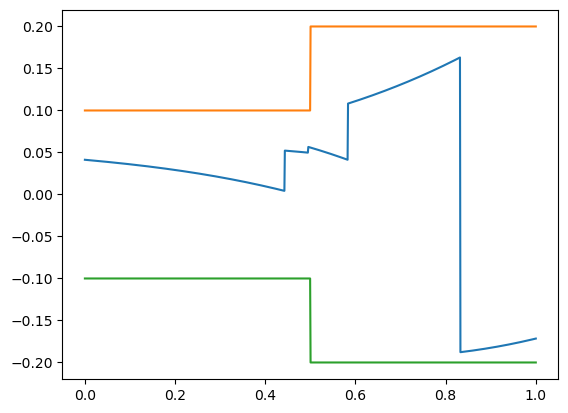

In [19]:
%matplotlib inline
true_model = M.random_member(seed=10)
bound = functions.Piecewise_1D(domain=domain, intervals=[0, 0.5, 1], values=[0.1, 0.2])
plt.plot(domain.mesh, true_model.evaluate(domain.mesh), label='true model')
plt.plot(domain.mesh, bound.evaluate(domain.mesh), label='bound')
plt.plot(domain.mesh, -bound.evaluate(domain.mesh), label='bound')
plt.show()


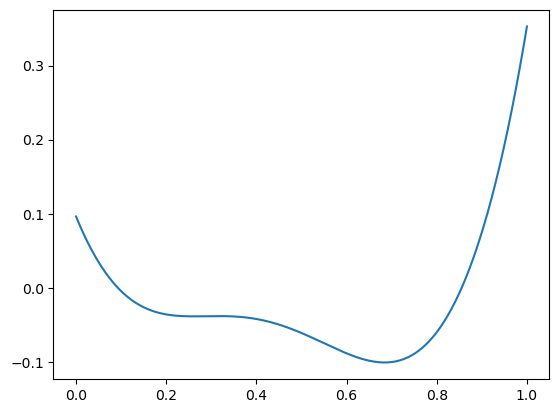

In [20]:
kernel = functions.NormalModes_1D(domain=domain, order=10, spread=1, max_freq=100, seed=1)
kernel.plot()

G = IntegralMapping(domain=M, codomain=D, kernels=[kernel])

In [21]:
#d = G.map(true_model)
d_true = G.map(true_model)
norm_bound = M.norm(bound)
print(d_true, norm_bound)

[[-0.00706484]] 0.1580980550006704


In [22]:
target = functions.Boxcar_1D(domain=domain, center=0.5, width=0.3)
T = IntegralMapping(domain=M, codomain=P, kernels=[target])

In [23]:
my_problem = Problem(M=M, D=D, P=P, G=G, T=T, norm_bound=norm_bound, data=d_true)
my_problem._compute_Gamma()
my_problem._compute_Lambda()
my_problem._compute_H_diag()
gamma = my_problem.Gamma.matrix
lambda_ = my_problem.Lambda.matrix
Hkk = my_problem.H_diag
print(my_problem.Gamma.matrix)
print(my_problem.Lambda.matrix)
print(my_problem.H_diag)

[[-0.0640294]]
[[0.00788993]]
[[2.81705015]]


In [30]:
p = np.linspace(-0.1, 0.1, 100)
r = np.sqrt(p**2 * gamma**2 / ((Hkk + gamma**2/lambda_)*lambda_) - p**2 + norm_bound**2 * Hkk)
rr = np.sqrt(p**2 *gamma**2 / (Hkk * lambda_ + gamma**2) - p**2 + norm_bound**2 * Hkk)

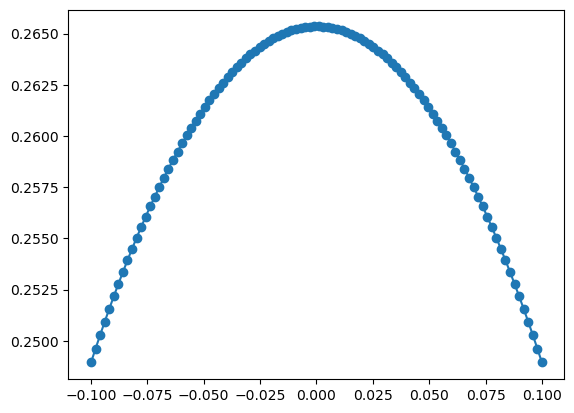

In [33]:
plt.plot(p, r[0])
plt.scatter(p, rr[0])
plt.show()